# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [70]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [71]:
#A) seu código aqui
df.dtypes

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

In [72]:
df['Gender'] = df['Gender'].astype(str)
df['Education'] = df['Education'].astype(str)
df['Marital Status'] = df['Marital Status'].astype(str)
df['Home Ownership'] = df['Home Ownership'].astype(str)
df['Credit Score'] = df['Credit Score'].astype(str)

print(f'Tipagem:\n {df.dtypes}')

Tipagem:
 Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object


In [73]:
df['Age'].unique()

array([25., 30., 35., 40., 45., 50., 26., 31., nan, 43., 48., 53., 29.,
       34., 39., 44., 49., 36., 41., 46., 51., 27., 32., 37., 42., 47.,
       52., 28., 33., 38.])

In [74]:
df['Income'] = (
    df['Income']
    .str.replace('.', '', regex=False)   # remove pontos de milhar
    .str.replace(',', '.', regex=False)  # troca vírgula por ponto
    .astype(float)                       # converte para float
)


In [75]:
print("\nDataFrame após alteração dos tipos em cada coluna:\n")
print(f'Tipagem:\n {df.dtypes}')


DataFrame após alteração dos tipos em cada coluna:

Tipagem:
 Age                   float64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [76]:
#seu código aqui
(df.isnull().sum() / len(df)) * 100

Age                   20.731707
Gender                 0.000000
Income                 0.000000
Education              0.000000
Marital Status         0.000000
Number of Children     0.000000
Home Ownership         0.000000
Credit Score           0.000000
dtype: float64

In [77]:
#verificando quantidade de linhas com o dado igual a nan
df['Age'].isna().sum()

np.int64(34)

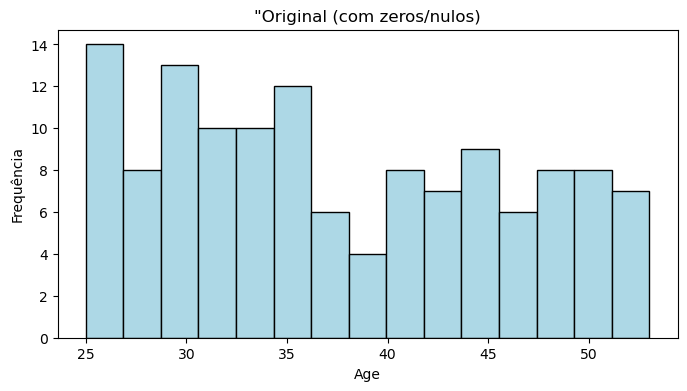

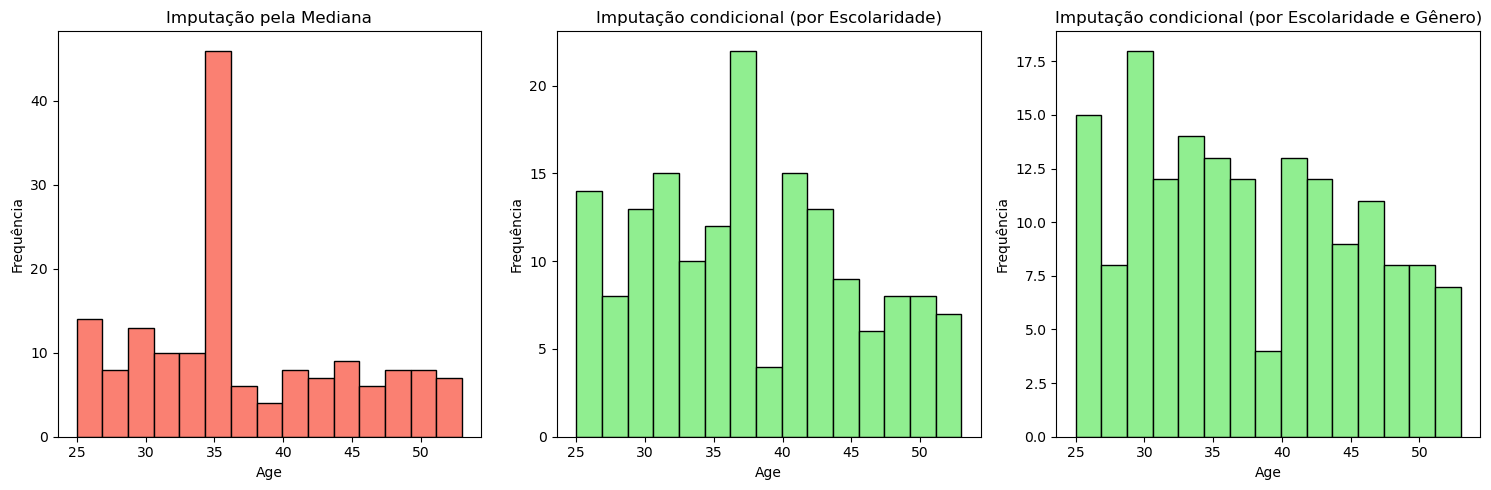

In [78]:
import numpy as np

df_original = df.copy()

# --- Estratégia 1: imputação pela mediana ---
mediana_age = df_original['Age'].median()
df_mediana = df_original.copy()
df_mediana['Age'] = df_mediana['Age'].fillna(mediana_age)


# --- Estratégia 2: imputação condicional utilizando o nivel de escolaridade ---
df_cond = df.copy()
df_cond['Age'] = df_cond['Age'].fillna(
    df_cond.groupby('Education')['Age'].transform('median')
)

# --- Estratégia 3: imputação condicional utilizando o nivel de escolaridade e genero ---
df_cond_2 = df.copy()
df_cond_2['Age'] = df_cond_2['Age'].fillna(
    df_cond_2.groupby(['Education', 'Gender'])['Age'].transform('median')
)

# --- Gráfico com os dados originais, sem o ajuste em age ---
plt.figure(figsize=(8,4))
plt.hist(df_original['Age'], bins=15, color='lightblue', edgecolor='black')
plt.title('"Original (com zeros/nulos)')
plt.xlabel('Age')
plt.ylabel('Frequência')
plt.show()

# --- Plotar os três histogramas lado a lado ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df_mediana['Age'], bins=15, color='salmon', edgecolor='black')
axes[0].set_title("Imputação pela Mediana")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Frequência")

axes[1].hist(df_cond['Age'], bins=15, color='lightgreen', edgecolor='black')
axes[1].set_title("Imputação condicional (por Escolaridade)")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Frequência")

axes[2].hist(df_cond_2['Age'], bins=15, color='lightgreen', edgecolor='black')
axes[2].set_title("Imputação condicional (por Escolaridade e Gênero)")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Frequência")

plt.tight_layout()
plt.show()



In [79]:
df = df_cond_2.copy()
df['Age'].unique()


array([25. , 30. , 35. , 40. , 45. , 50. , 26. , 31. , 36. , 41. , 29. ,
       34. , 37.5, 43. , 47. , 48. , 53. , 39. , 44. , 49. , 46. , 51. ,
       27. , 32. , 37. , 42. , 52. , 28. , 33. , 38. ])

In [80]:
df['Age'] = df['Age'].astype(int)
df['Age'].unique()

array([25, 30, 35, 40, 45, 50, 26, 31, 36, 41, 29, 34, 37, 43, 47, 48, 53,
       39, 44, 49, 46, 51, 27, 32, 42, 52, 28, 33, 38])

# RESPOSTA A LETRA B

A coluna Age tinha 34 registros como NaN. Para corrigir, primeiro usei a mediana mas percebi que gerou um pico muito alto que não existia na distribuição original. Como Isso estava mudando muito a distribuição dos dados, verifiquei como se comportaria se fosse utilizado a imputação condicional. Primeiro fiz por escolaridade que melhorou a distribuição mas ainda permanecia um pico no gráfico. Então resolvi fazer dois agrupamentos, por escolaridade e por genero. Mesmo com o pico em 30 anos pude notar que em comparação as duas formas anteriores foi onde a distribuição ficou mais próxima ao gráfico original. Portanto mantive como escolha a alteração pela mediana agrupada por escolaridade e gênero.

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [81]:
#seu código aqui
colunas = [
    "Gender",
    "Education",
    "Marital Status",
    "Home Ownership",
    "Credit Score"
]

# Loop para mostrar os valores únicos de cada coluna
for col in colunas:
    print(f"\nValores únicos da coluna '{col}':")
    print(df[col].unique())


Valores únicos da coluna 'Gender':
['Female' 'Male']

Valores únicos da coluna 'Education':
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]

Valores únicos da coluna 'Marital Status':
['Single' 'Married']

Valores únicos da coluna 'Home Ownership':
['Rented' 'Owned']

Valores únicos da coluna 'Credit Score':
['High' 'Average' 'Low']


# RESPOSTA A LETRA C
Depois de verificar os tipos unicos de cada uma das variáveis categóricas, não localizei nenhum registro que necessite de tratamento.

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

# INSIGHTS
As variáveis Age e Income não possuem outiliers e mostram ter uma alta amplitude, principalmente o Age. O numero de crianças que parece estar desbalanceado. 

In [82]:
#seu código aqui
df.describe().round(2)

,Age,Income,Number of Children
count,164.00,164.00,164.00
mean,37.53,83765.24,0.65
std,8.06,32457.31,0.88
min,25.00,25000.00,0.00
25%,30.75,57500.00,0.00
50%,37.00,83750.00,0.00
75%,44.00,105000.00,1.00
max,53.00,162500.00,3.00


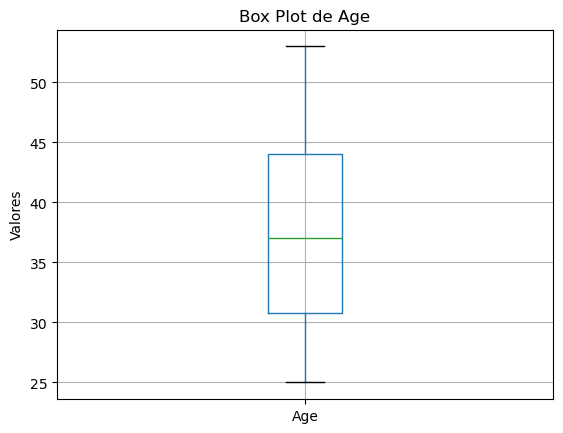

In [83]:
df.boxplot(column='Age')
plt.title('Box Plot de Age')
plt.ylabel('Valores')
plt.show()

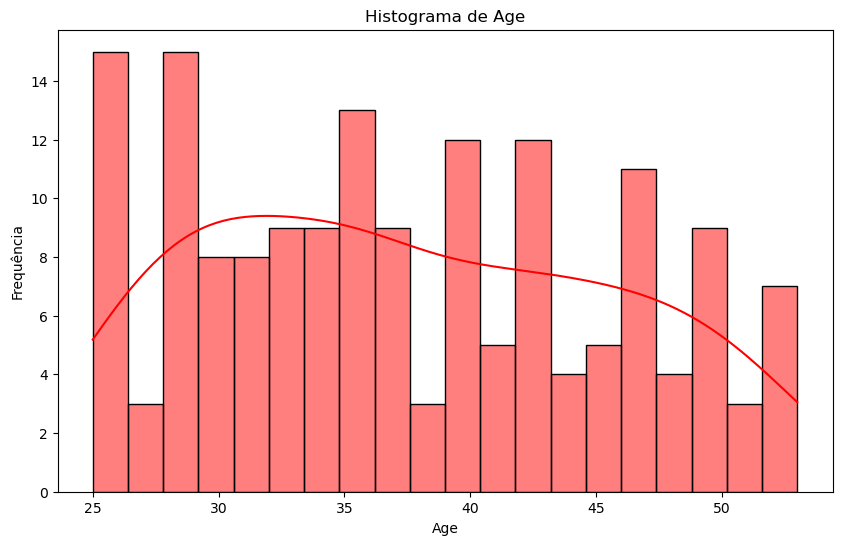

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='red')
plt.title('Histograma de Age')
plt.xlabel('Age')
plt.ylabel('Frequência')
plt.show()

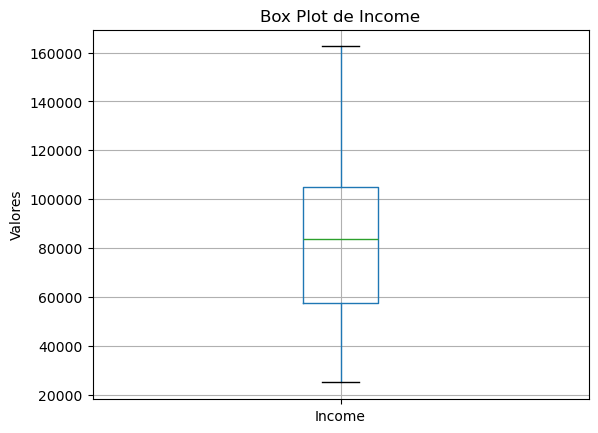

In [85]:
df.boxplot(column='Income')
plt.title('Box Plot de Income')
plt.ylabel('Valores')
plt.show()

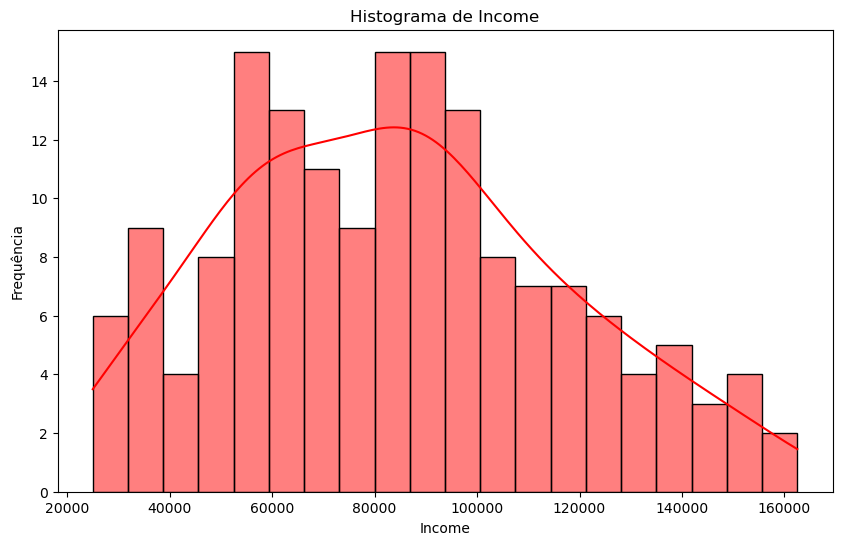

In [86]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Income', bins=20, kde=True, color='red')
plt.title('Histograma de Income')
plt.xlabel('Income')
plt.ylabel('Frequência')
plt.show()

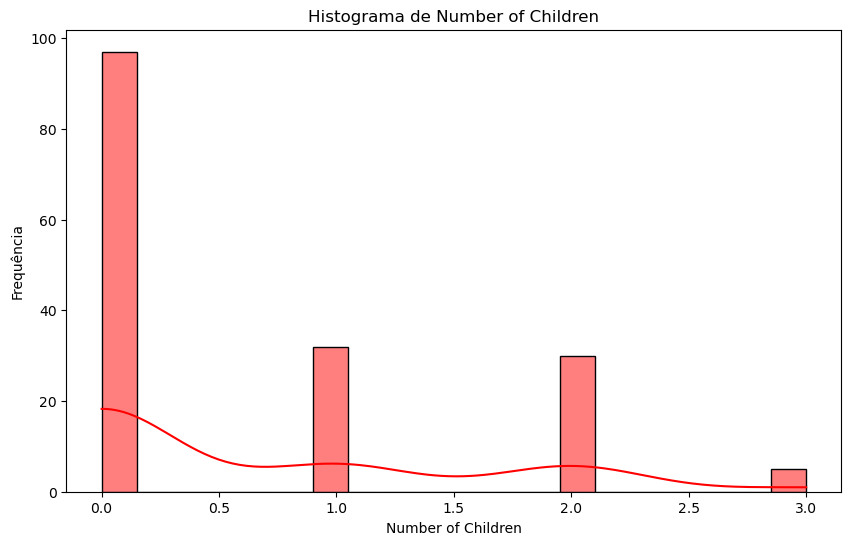

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Number of Children', bins=20, kde=True, color='red')
plt.title('Histograma de Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequência')
plt.show()

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

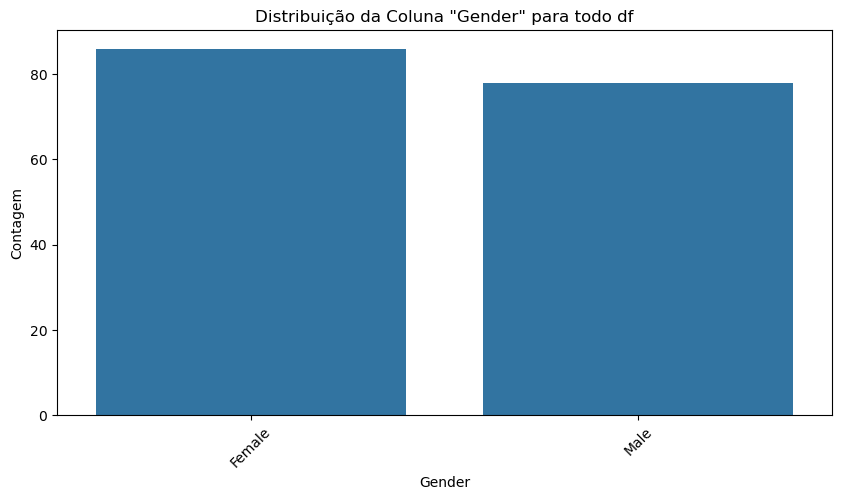

In [88]:
#seu código aqui
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Gender')
plt.title('Distribuição da Coluna "Gender" para todo df')
plt.xlabel('Gender')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# INSIGHTS DO GRÁFICO PARA GENERO
A quantidade de registros masculinos e femininos possuem valores próximos, indicando que há um balanceamento nos dados.

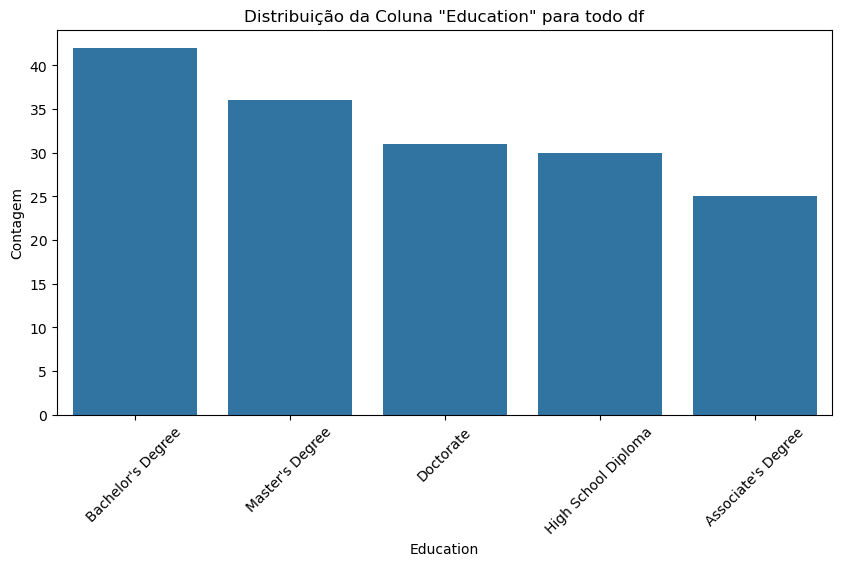

In [89]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Education')
plt.title('Distribuição da Coluna "Education" para todo df')
plt.xlabel('Education')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# INSIGHTS DO GRÁFICO PARA EDUCATION
A quantidade de registros desta variável possuem valores próximos, indicando que há um balanceamento nos dados. Podemos verificar que "associate's degree" está em menor número quando comparado ao "bachelor's degree" mas ainda assim a diferença não é grande o suficiente para consideramos que existe um desbalanceamento nesta variável.

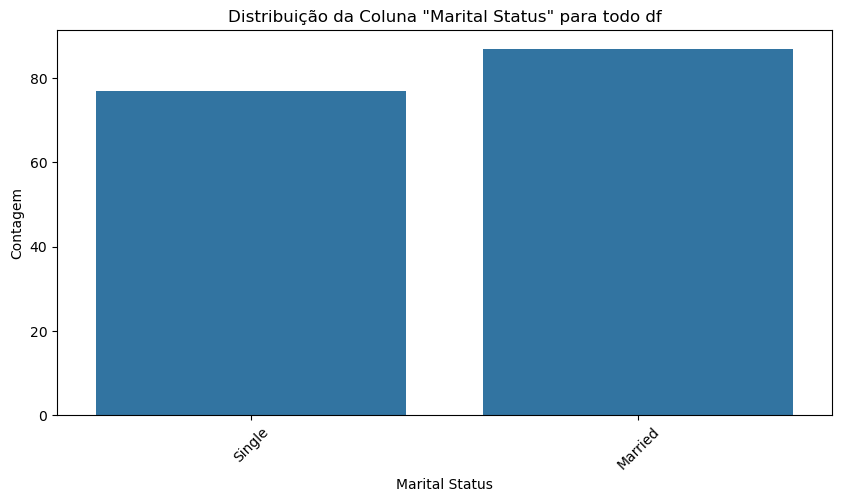

In [90]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Marital Status')
plt.title('Distribuição da Coluna "Marital Status" para todo df')
plt.xlabel('Marital Status')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# INSIGHTS DO GRÁFICO PARA MARITAL STATUS
A quantidade de registros solteiros e casados possuem valores próximos, indicando que há um balanceamento nos dados nesta variável.

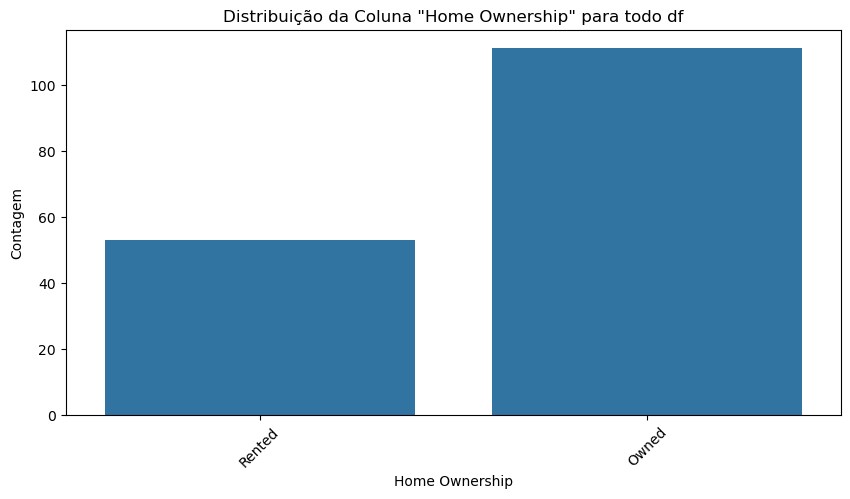

In [91]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Home Ownership')
plt.title('Distribuição da Coluna "Home Ownership" para todo df')
plt.xlabel('Home Ownership')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# INSIGHTS DO GRÁFICO PARA HOME OWNERSHIP
Aqui podemos perceber claramento um desbalanceamento já que "rented" tem metade da quantidade de registros em comparação a "Owned".

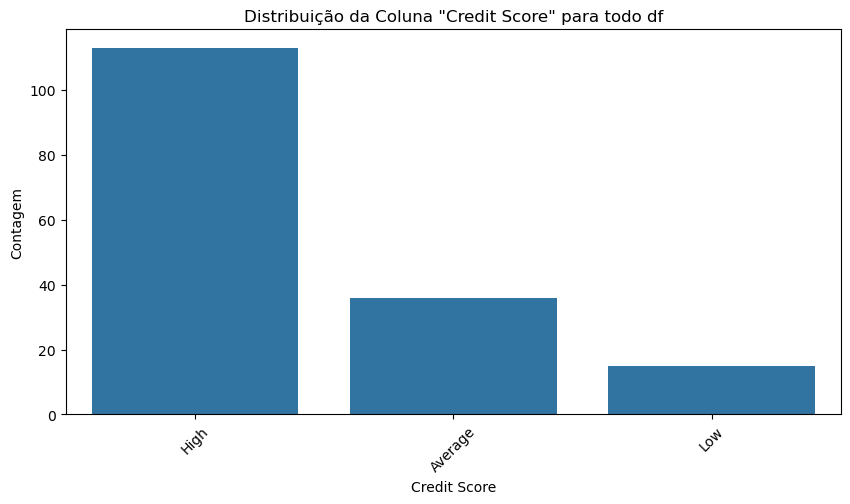

In [92]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Credit Score')
plt.title('Distribuição da Coluna "Credit Score" para todo df')
plt.xlabel('Credit Score')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# INSIGHTS DO GRÁFICO PARA CREDIT SCORE
Aqui também podemos ver um desbalanceamento, além do ponto de atenção referente a multicolinearidade. Como tem três tipos de scores, podemos preferer um deles baseado nos valores dos outros dois. Neste caso teremos que fazer um tratamento para balancear os dados e fazer os devidos ajustes para evitar o problema de multicolinearidade.

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

# RESPOSTA DA LETRA C
Não foi encontrado nenhum outlier nos dados.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



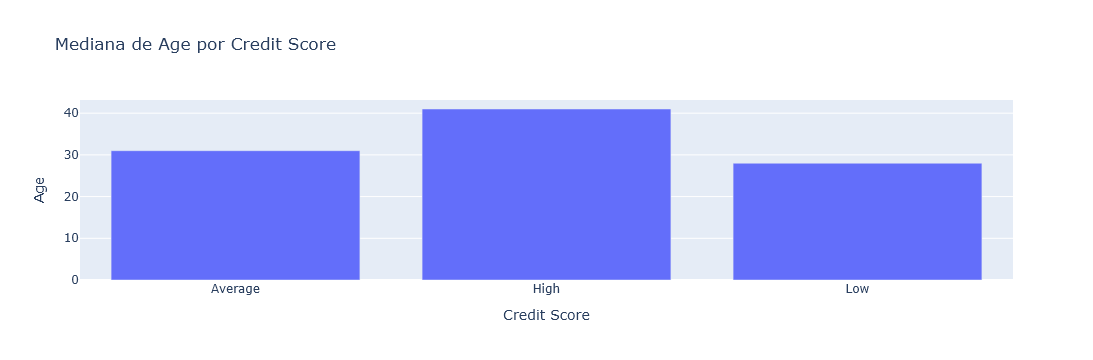

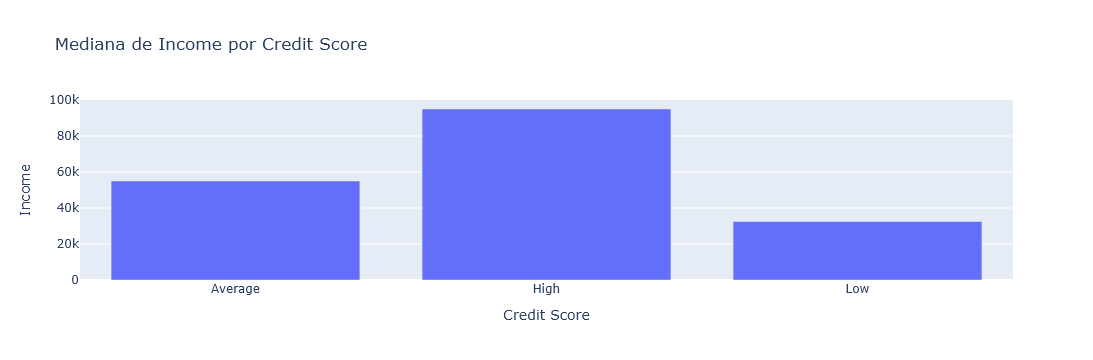

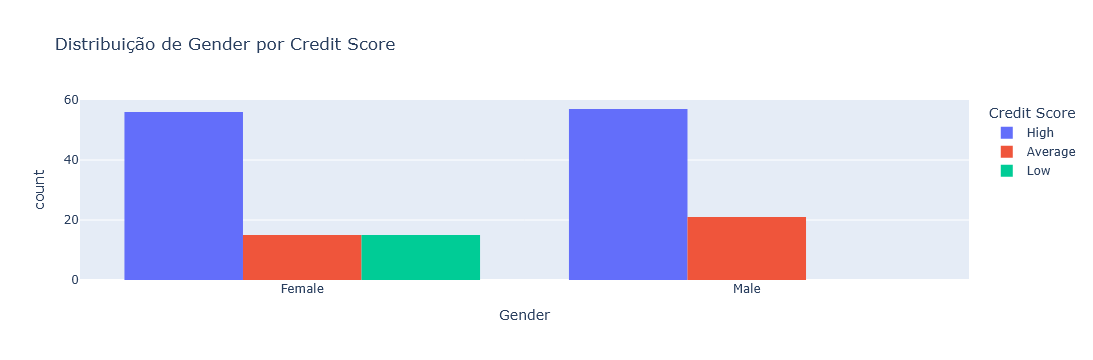

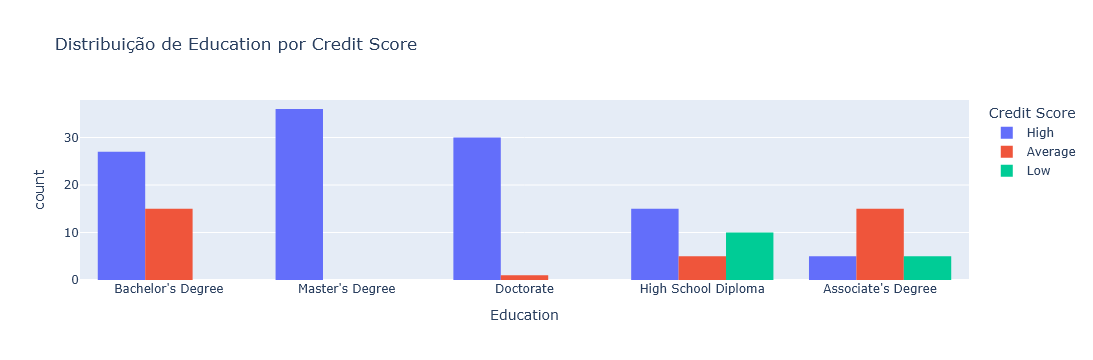

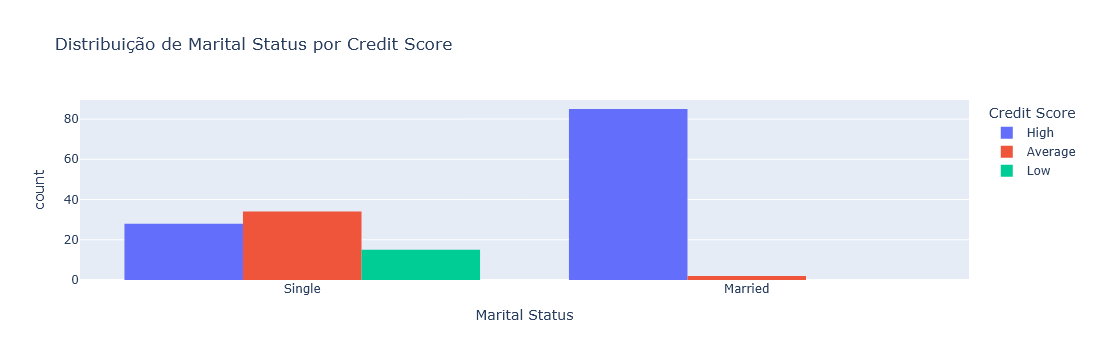

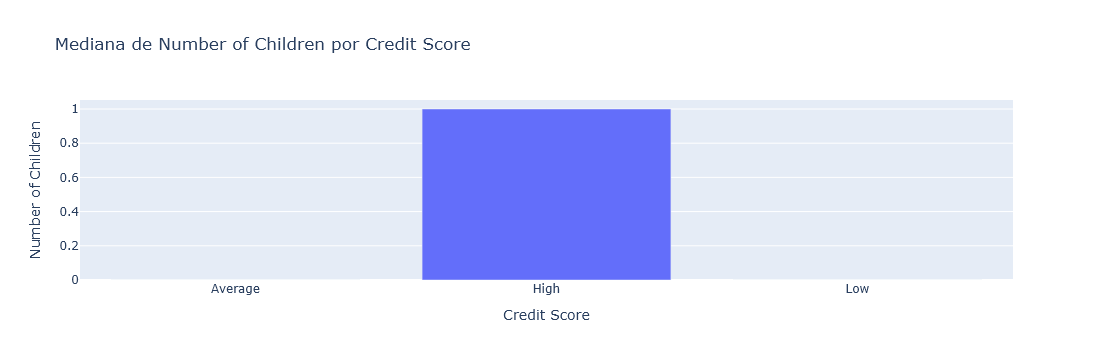

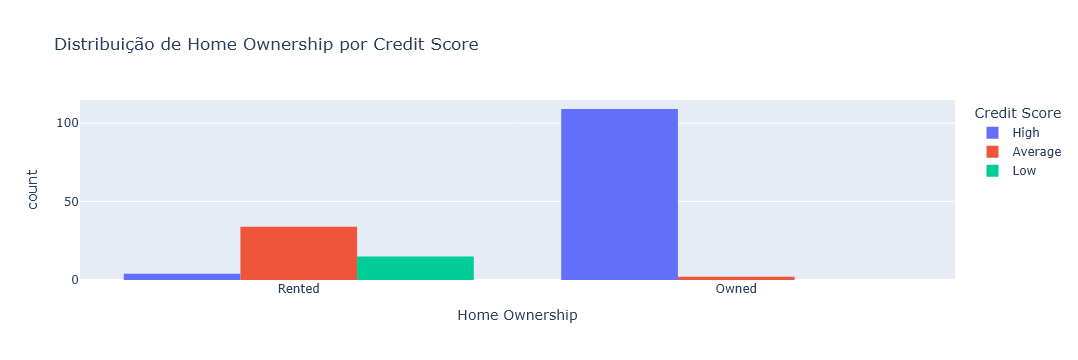

In [93]:
# Analisando cada variavel com o credit score
# Lista de colunas originais
colunas = [
    'Age', 'Income', 'Gender', 'Education', 'Marital Status',
    'Number of Children', 'Home Ownership'
]

# Loop para gerar um gráfico para cada coluna
for col in colunas:
    if df[col].dtype in ['int64', 'float64']:
        # Numéricas → gráfico de mediana
        mediana = df.groupby('Credit Score')[col].median().reset_index()
        fig = px.bar(mediana, x='Credit Score', y=col,
                     title=f'Mediana de {col} por Credit Score')
    else:
        # Categóricas → gráfico de contagem
        fig = px.histogram(df, x=col, color='Credit Score', barmode='group',
                           title=f'Distribuição de {col} por Credit Score')
    
    fig.show()

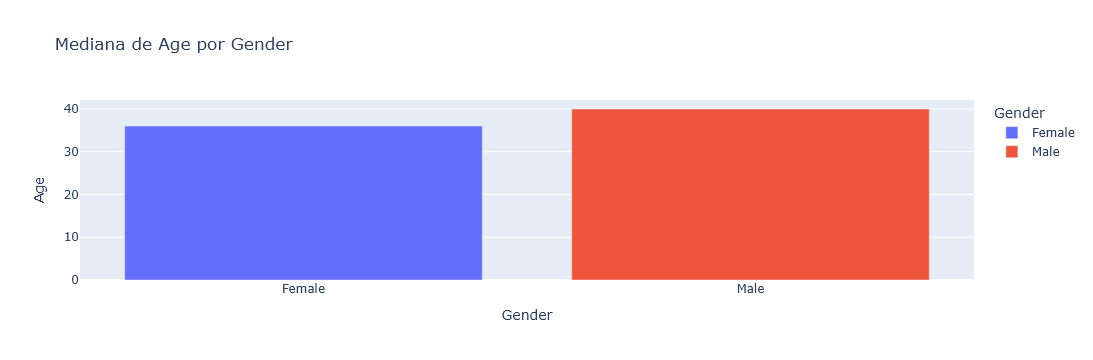

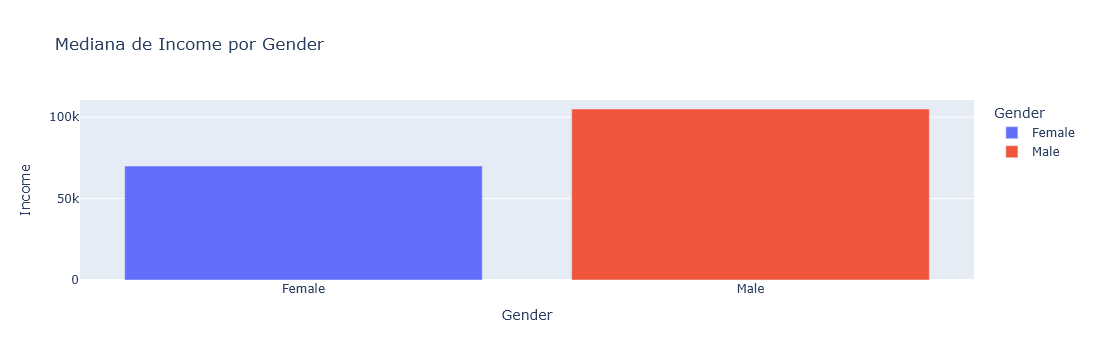

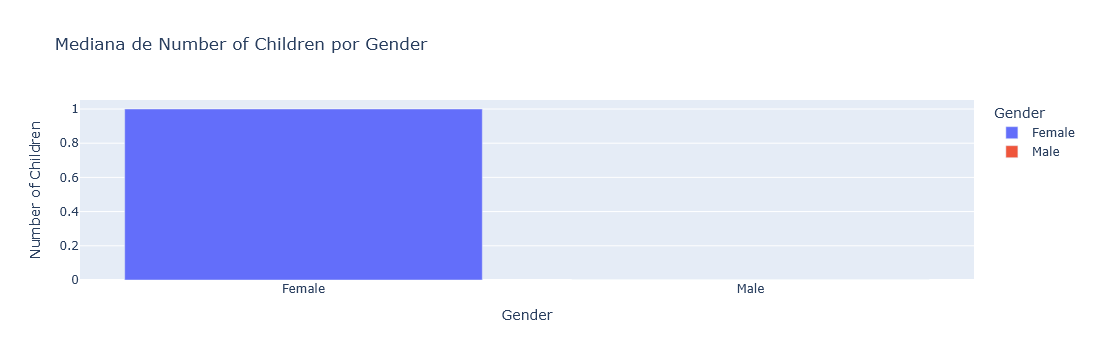

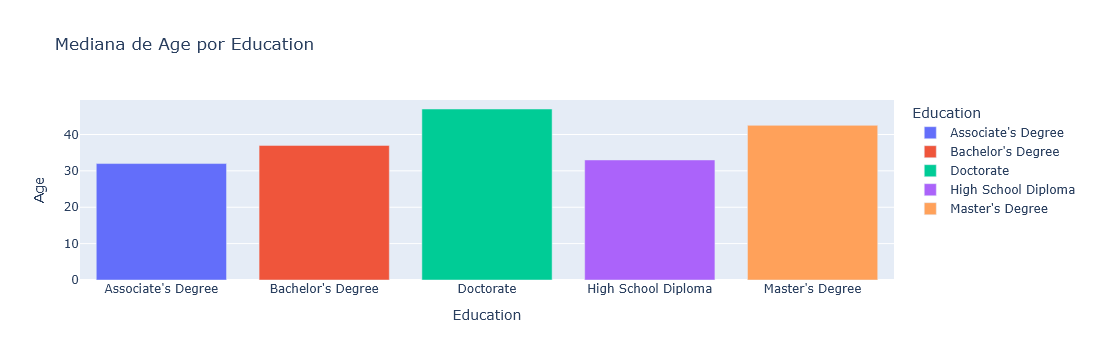

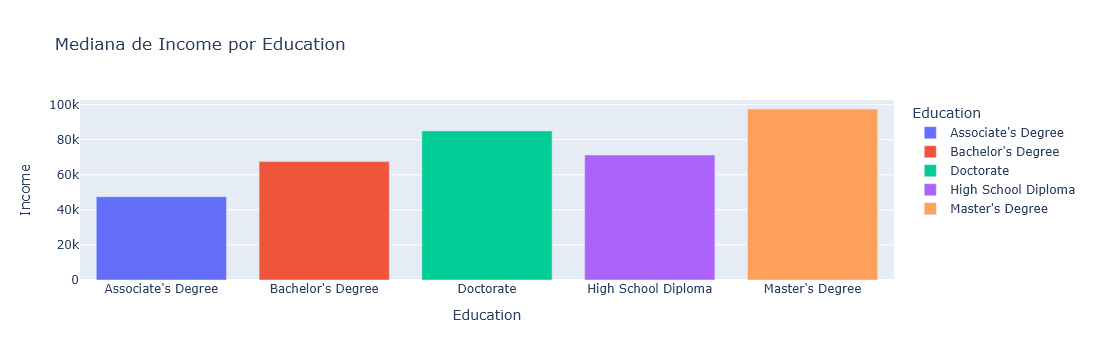

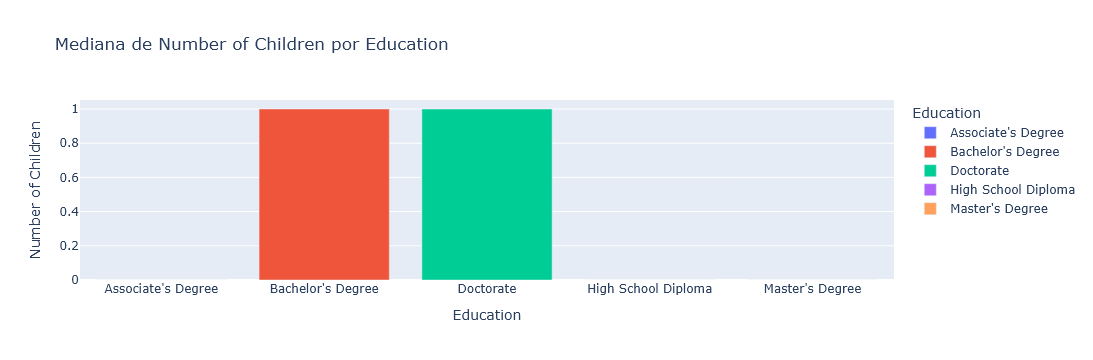

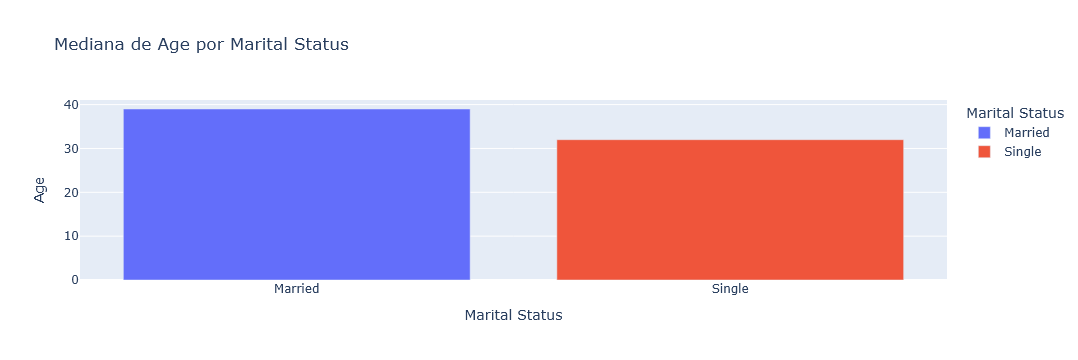

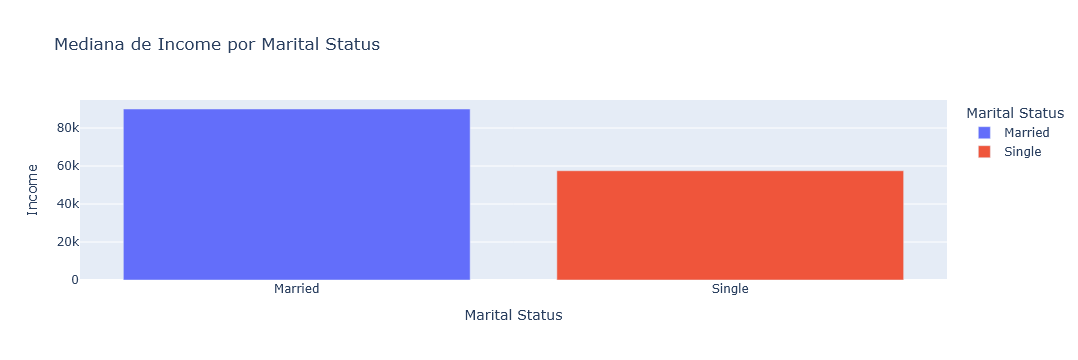

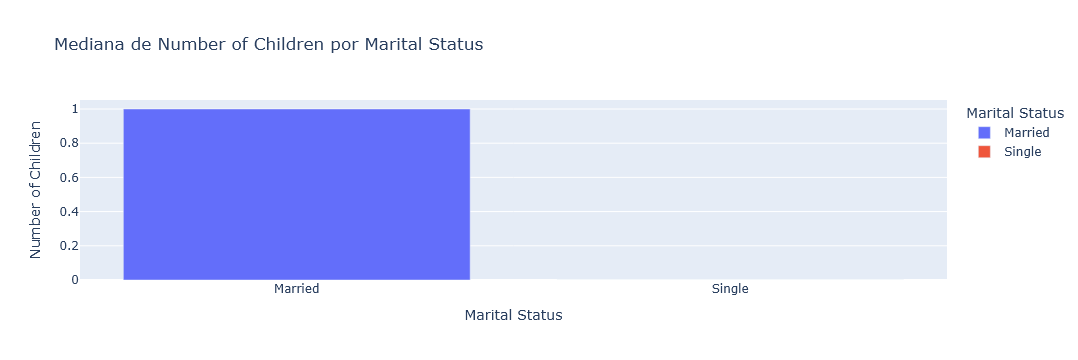

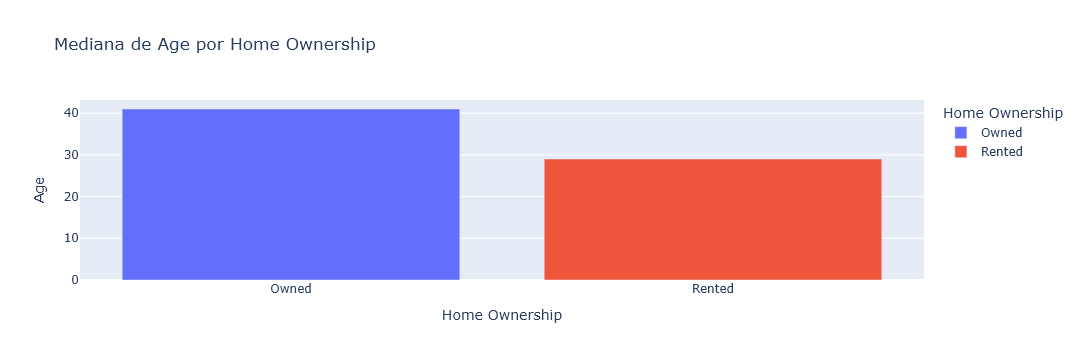

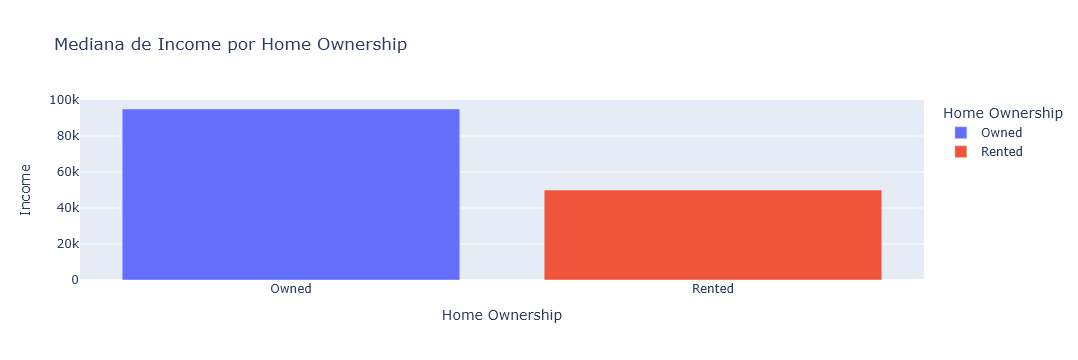

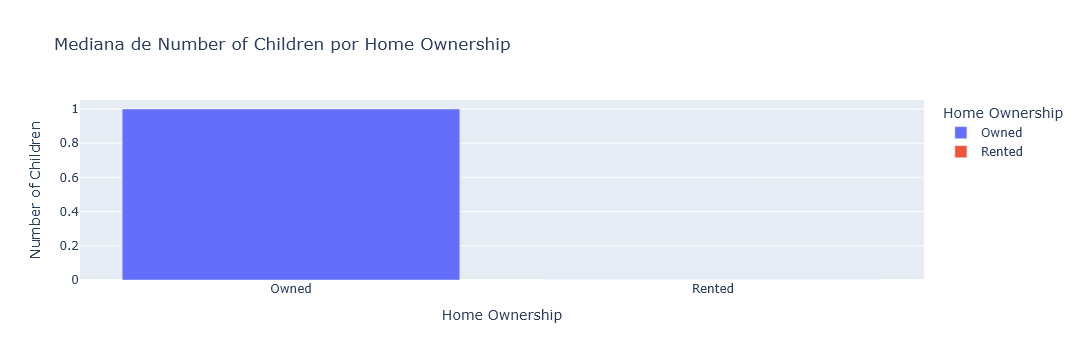

In [94]:
categoricas = ['Gender', 'Education', 'Marital Status', 'Home Ownership']
numericas = ['Age', 'Income', 'Number of Children']

# Loop para gerar gráficos de barras
for cat in categoricas:
    for num in numericas:
        # Calcula a mediana da variável numérica por categoria
        resumo = df.groupby(cat)[num].median().reset_index()
        
        # Cria gráfico de barras
        fig = px.bar(resumo, x=cat, y=num,
                     title=f'Mediana de {num} por {cat}',
                     color=cat)
        fig.show()

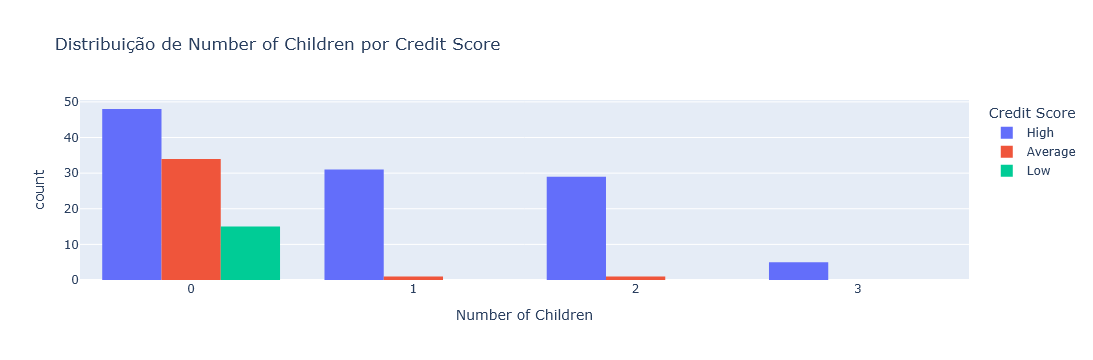

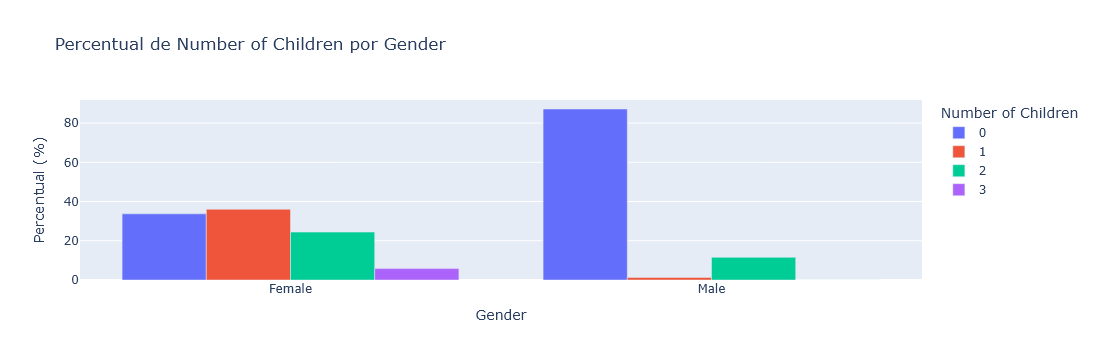

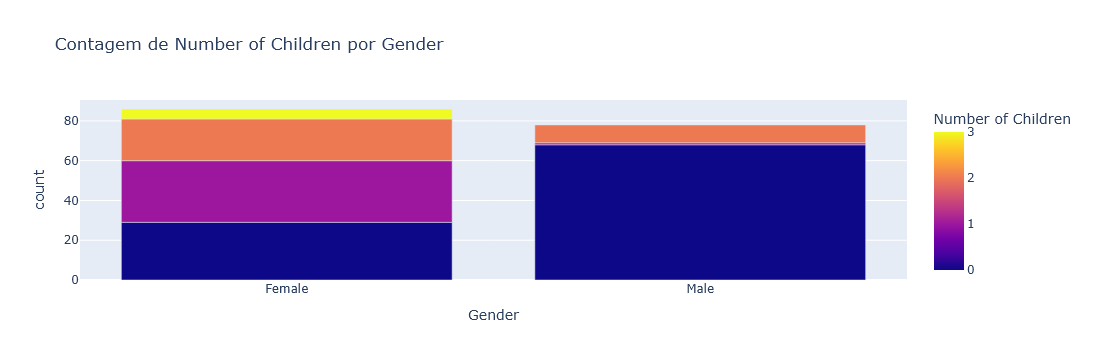

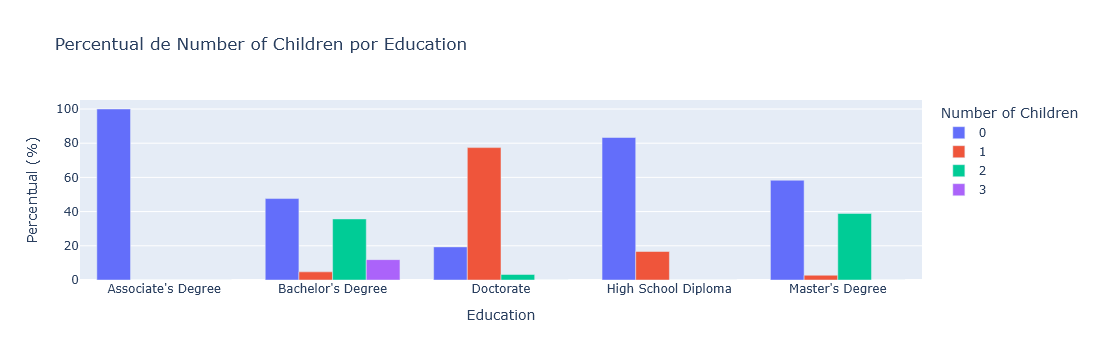

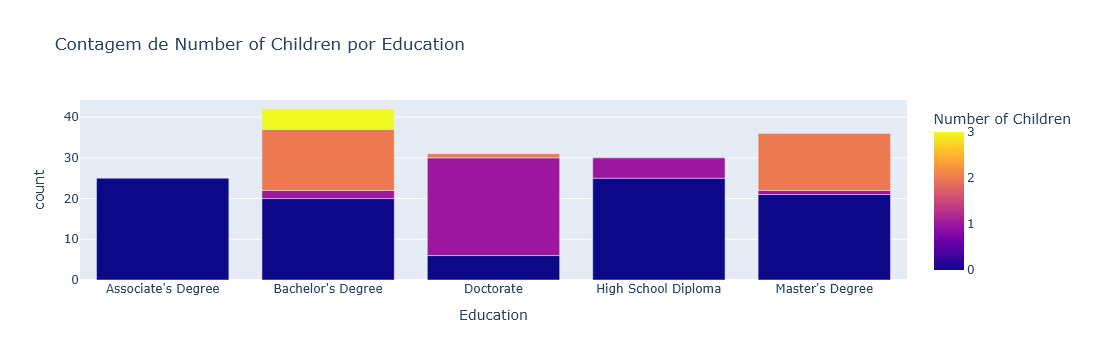

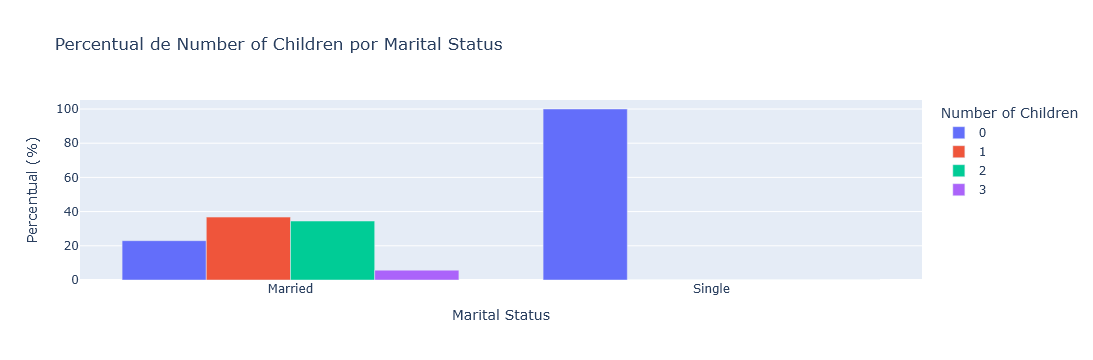

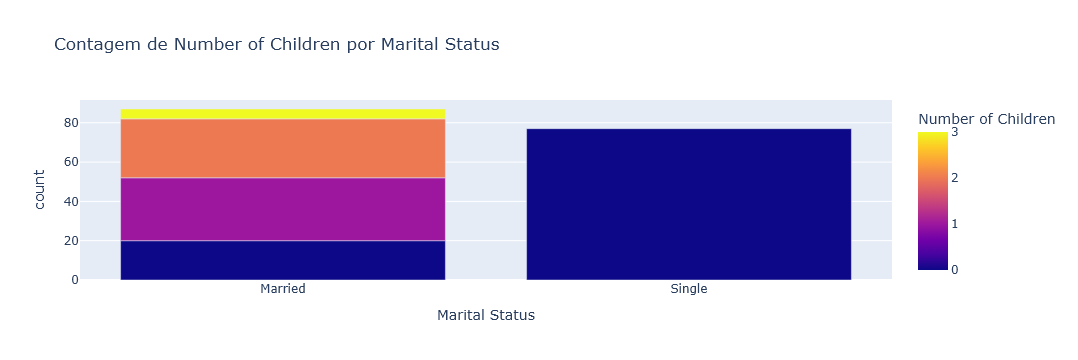

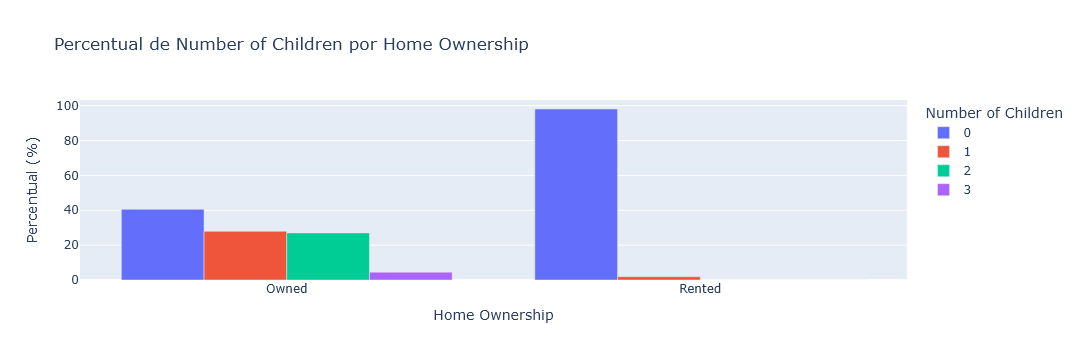

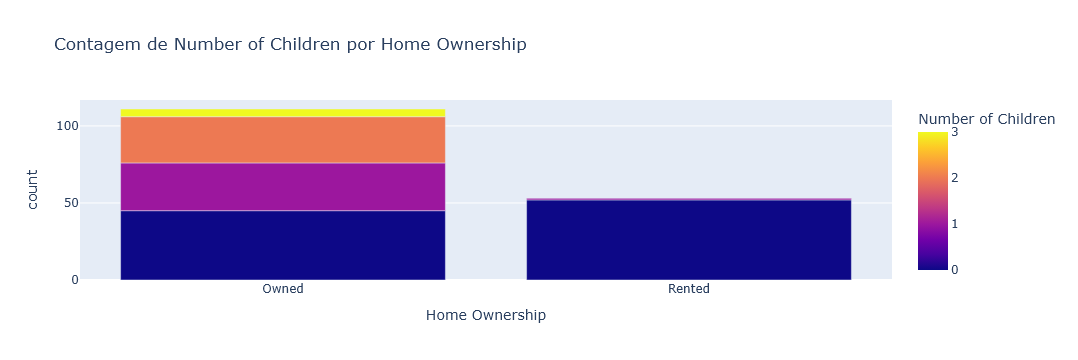

In [95]:
# 1. Number of Children vs Credit Score
fig = px.histogram(df, x='Number of Children', color='Credit Score', 
                   barmode='group',
                   title='Distribuição de Number of Children por Credit Score',
                   category_orders={'Number of Children': [0, 1, 2, 3]})
fig.update_xaxes(tickmode='linear', tick0=0, dtick=1)
fig.show()

# 2. Number of Children vs cada variável categórica
categoricas = ['Gender', 'Education', 'Marital Status', 'Home Ownership']

for cat in categoricas:
    # Tabela cruzada
    cross_tab = pd.crosstab(df[cat], df['Number of Children'], normalize='index') * 100
    
    fig = px.bar(cross_tab, 
                 title=f'Percentual de Number of Children por {cat}',
                 labels={'value': 'Percentual (%)', 'variable': 'Number of Children'},
                 barmode='group')
    fig.show()
    
    # Ou versão com contagem absoluta
    resumo = df.groupby([cat, 'Number of Children']).size().reset_index(name='count')
    fig2 = px.bar(resumo, x=cat, y='count', color='Number of Children',
                  title=f'Contagem de Number of Children por {cat}',
                  barmode='group',
                  category_orders={'Number of Children': [0, 1, 2, 3]})
    fig2.show()

# RESPOSTA LETRA D - PARTE 1 - INSIGHTS TIRADO DOS GRÁFICOS:
* A idade pode ter relação com credit score. Quem tem em media 41 anos possui alto score, idade em torno de 28 é baixo e 31 é medio.
* Salario mensal parece ter uma relação ainda mais forte com o score. quanto mais alto o salario, maior é o score.
* Não foi visto nenhum homem com baixo score. Isso pode sugerir um desbalanceamento que deve ser ajustado mais a frente. 
* As escolaridades bacharelado, mestrado e doutorado não tem os três tipos de score. Eles também são os que possuem o o score mais alto, em comparação com as outras escolaridades.
* O estado civil casado é o que tem o mais alto crédito, embora ele não tenha os três tipos de créditos.
* Quem tem o maior crédito são as pessoas com casa própria. Embora essa categoria não tenha exemplos dos três tipos.
* As pessoas do sexo masculino tem um maior salario do que as do gênero feminino.
* As escolaridades de mestrado e doutorado são os com a idade mais avançada.
* A mediana com salario mais alto é mestrado, no entanto isso reflete a quantidade de registros que é maior em pessoas com mestrado do que as que possuem doutorado. Os outros níveis seguem uma linha gradual , o salario vai aumentando enquanto o nível de escolaridade aumenta.
* O estado civil de casados são com a idade mais avançada que os de solteiros.
* O salario de quem é casado é quase o dobro do salário de quem é solteiro.
* Quem tem casa prórpia possue maior idade do que as pessoas com casas alugadas.
* Pessoas casadas recebem quase o dobro de quem é solteiro
* O gênero masculino tem a menor quantidade de filhos(percentual de 0 é muito mais alto).
* Os dados podem estar desbalanceados em relação a quantidade de filhos com o genero masculino. Não vemos a quantidade de 1 e 3 filhos.
* Quem tem doutorado possui a maior porcentagem de pessoas com somente um filho. 
* Também pode haver um desbalanceamento de numero de filhos com a variavel escolaridade, para cada tipo de escolaridade. 
* Todos os solteiros tem 0 filhos.
* Casados tem em maior quantidade 1 e 2 filhos.
* Os dados em relação as pessoas com casa alugada e quantidade de filhos podemos ver uma quase totalidade de 0 filhos e pouquíssimos registros com 1 filhos. As outras opções não existem aqui.

# RESPOSTA LETRA D - PARTE 2 - RESPONDENDO AS PERGUNTAS

Primeiro eu gerei todos os gráficos de forma a entender de uma maneira mais ampla e completa a relação das variaveis entre si. A medida que ia fazendo os gráficos, fui anotando em tópicos os insights que eu conseguia ver em cada gráfico. Ao gerar o último gráfico, anotei os últimos insights. Depois disso olhei as perguntas da letra d e procurei nos itens que anotei a resposta e tentei sintetizar os itens encontrados em forma de resposta. 

Abaixo as respostas de cada item:

**1 - Existe relação entre a idade e o status civil?**
Sim, existe uma relação clara. Os casados são mais velhos que os solteiros. Isso faz sentido, já que o casamento tende a ocorrer após um certo período da vida adulta. A relação também é confirmada pelo fato de que todos os solteiros têm 0 filhos, indicando que esse grupo pode estar em uma fase de vida mais inicial.

**2 - Qual a relação entre o score de crédito e o nível de escolaridade?**
Existe uma relação forte. Níveis de escolaridade mais altos (bacharelado, mestrado e doutorado) estão associados aos scores mais altos de crédito. Esses grupos não apresentam os três tipos de score (baixo, médio e alto) - concentram-se principalmente em scores altos. Isso sugere que quanto maior a educação, maior renda, resultando em scores superiores.

*Observação importante: Há indícios de desbalanceamento nos dados para essas categorias de escolaridade.*

**3 - O salário parece influenciar na idade?**
Não há evidência clara de que o salário influencie a idade (acredito ser o contrário). O que os dados parecem mostrar é que a idade influencia o salário: mestrado e doutorado têm as idades mais avançadas e também salários mais altos. Isso reflete uma evolução de carreira - pessoas mais velhas costumam ter mais experiência e, consequentemente, salários maiores.

**4 - O salário parece influenciar no Score de Crédito?**
Sim, e a relação é muito forte. O salário mensal parece ter uma relação ainda mais forte com o score do que a idade. Quanto mais alto o salário, maior é o score de crédito. Isso faz sentido, pois renda mais alta geralmente significa maior facilidade para pagamento, diminuindo o risco de dívidas.

**5 - Clientes com casa própria tendem a ter um score mais alto?**
Sim. As pessoas com casa própria possuem o maior crédito entre as categorias de tipo de residência. Além disso, pessoas com casa própria também possuem maior idade e salário mais alto do que pessoas com casas alugadas, sugerindo uma relação entre estabilidade financeira, casa prórpia e score de crédito.

*Observação importante: Essa categoria também não apresenta exemplos dos três tipos de score, indicando possível desbalanceamento nos dados.*

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

## Mais três perguntas elaboradas que foram feitas antes da criação dos gráficos acima:
1. Qual variável parece ter a mais forte associação com o credit score?
2. O estado civil influencia no score dos clientes?
3. Existe diferença no score entre homens e mulheres?

**Para a primeira pergunta** a variável que parece ter mais forte conexão com o score é a variável salário. O que faz sentido, já que quanto maior o salário, maior a facilidade de pagar suas dividas.

**Para a segunda pergunta** acredito que ocorra uma correlação indireta. Foi gerado um gráfico para ver a correlação de estado civil com escolaridade. As maiores porcentagens para solteiro são: diploma escolar, tecnologico, seguido de mestrado. Já para casados são: bacharelado, doutorado e em terceiro mestrado. Posso deduzir que o casamento pode ocorrer na fase de mestrado ou depois. Quando olhamos a mediana da idade das pessoas com mestrado podemos verificar que é menor do que a de doutorado e como a mediana das pessoas casadas é maior do que a das pessoas solteiras, podemos entender que as pessoas casadas tem um maior crédito por já serem mais velhas, com a formação mais avançadas e consequentemente com maiores salários. 

**Para a terceira pergunta** os homens parecem ter um salário mais alto e um maior score consequentemente. Mas parece ter um desbalanceamento já que não foi visto nenhum homem com score baixo. 

***Todos os insights já foram informados na questão anterior***

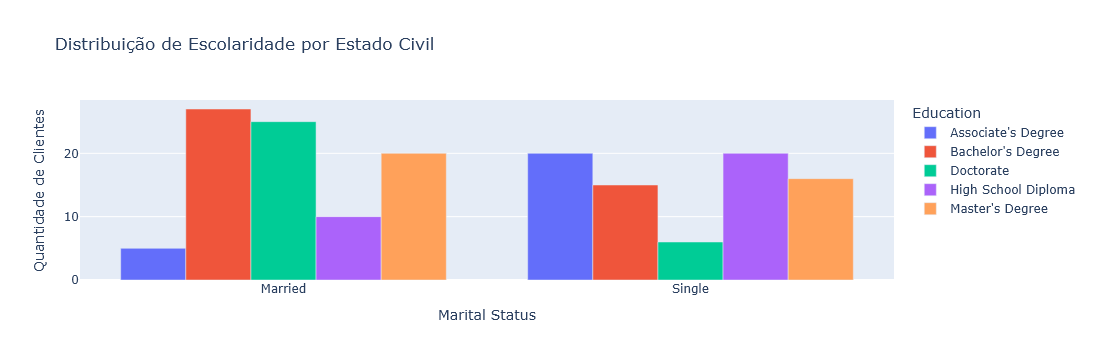

In [96]:
# seu código aqui
resumo = df.groupby(['Marital Status', 'Education']).size().reset_index(name='count')

fig = px.bar(resumo, 
             x='Marital Status', 
             y='count', 
             color='Education',
             title='Distribuição de Escolaridade por Estado Civil',
             barmode='group',
             labels={'count': 'Quantidade de Clientes'})
fig.show()

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

In [97]:
#seu código aqui
df.select_dtypes(include=['number']).corr()

,Age,Income,Number of Children
Age,1.000000,0.629385,0.093232
Income,0.629385,1.000000,0.084547
Number of Children,0.093232,0.084547,1.000000


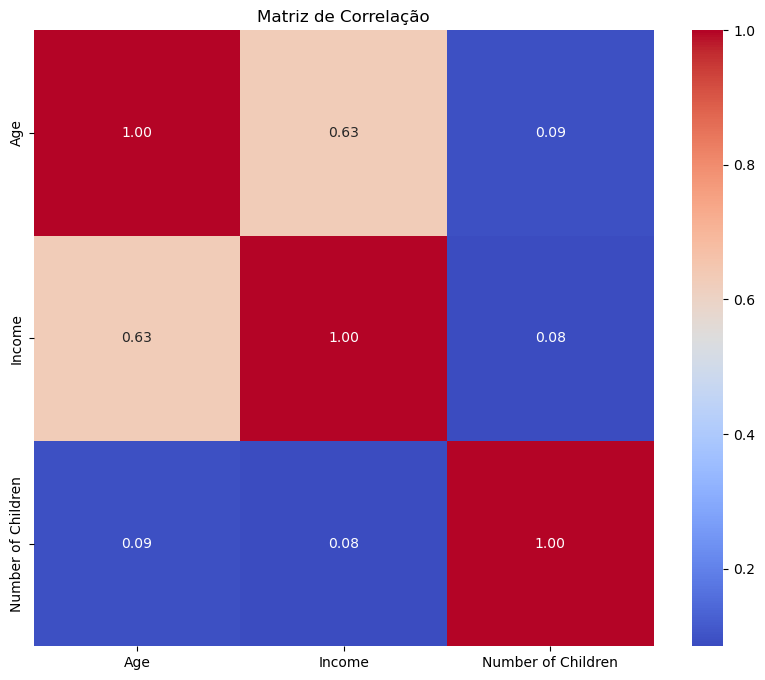

In [98]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

# sua justificativa aqui
A média de correlação mais alta é idade com salário mensal, uma correlação positiva. Faz sentido se pensarmos que quanto mais idade temos, mais experiência acumulamos e essas experiÊnciar podem trazer maiores frutos no trabalho. Aumentar o cargo com o tempo, estudar mais coisas e conquistar uma nova posição. Faz sentido ambas estarem relacionadas.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [99]:
df.head(5)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35,Female,75000.0,Doctorate,Married,1,Owned,High
3,40,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45,Female,100000.0,Bachelor's Degree,Married,3,Owned,High


In [100]:
df['Education'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [101]:
educacao_ordem = {
    "High School Diploma": 1,
    "Associate's Degree": 2,
    "Bachelor's Degree": 3,
    "Master's Degree": 4,
    "Doctorate": 5
}
df['education_ordinal'] = df['Education'].map(educacao_ordem)

In [102]:
#salvando uma copia do dataframe antes de apagar as colunas
df_copy = df

In [103]:
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender')
df = pd.get_dummies(df, columns=['Marital Status'], prefix='Marital Status')
df = pd.get_dummies(df, columns=['Home Ownership'], prefix='Home Ownership')

In [105]:
df['Credit Score'].unique()

array(['High', 'Average', 'Low'], dtype=object)

In [106]:
from sklearn.preprocessing import LabelEncoder

# Criando uma instância do Label Encoder
label_encoder = LabelEncoder()

# Aplicando o Label Encoder para a coluna "Genero" - ideal
df['Credit_Score_encoded'] = label_encoder.fit_transform(df['Credit Score'])

In [109]:
df = df.drop(columns=['Education'])
df = df.drop(columns=['Credit Score'])

df.head(10)

,Age,Income,Number of Children,education_ordinal,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Single,Home Ownership_Owned,Home Ownership_Rented,Credit_Score_encoded
0,25,50000.0,0,3,True,False,False,True,False,True,1
1,30,100000.0,2,4,False,True,True,False,True,False,1
2,35,75000.0,1,5,True,False,True,False,True,False,1
3,40,125000.0,0,1,False,True,False,True,True,False,1
4,45,100000.0,3,3,True,False,True,False,True,False,1
5,50,150000.0,0,4,False,True,True,False,True,False,1
6,26,40000.0,0,2,True,False,False,True,False,True,0
7,31,60000.0,0,3,False,True,False,True,False,True,0
8,36,80000.0,2,4,True,False,True,False,True,False,1
9,41,105000.0,0,5,False,True,False,True,True,False,1


**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

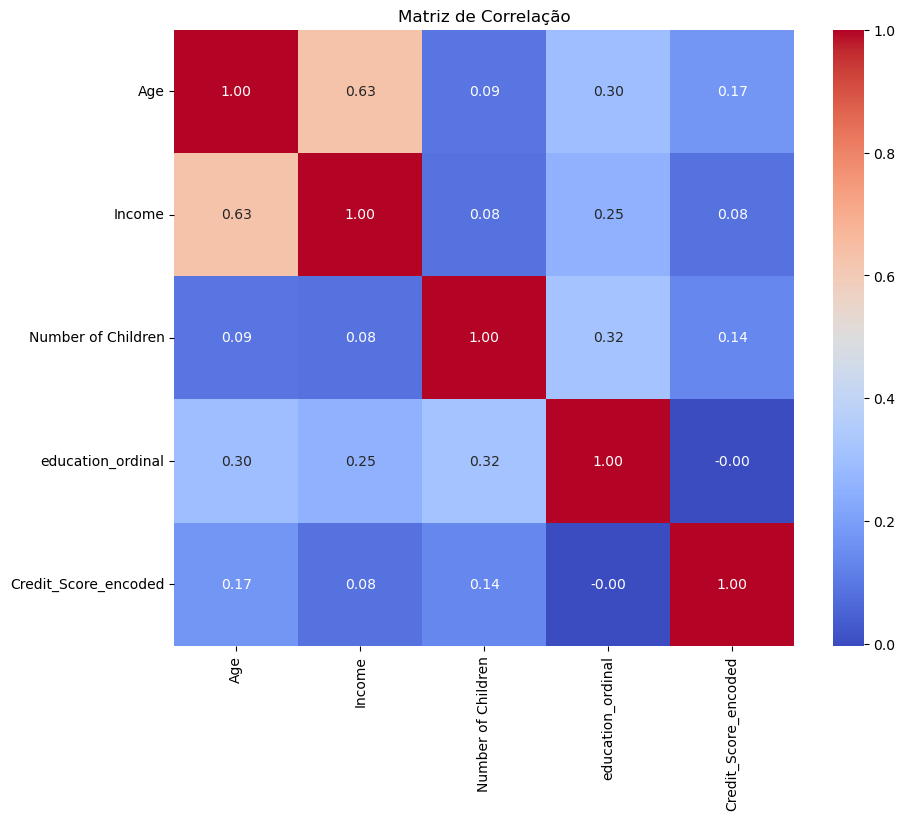

In [110]:
#seu código aqui
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plotar o mapa de calor da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlação')
plt.show()

# ANÁLISE
A correlação de idade com salário mensal ainda é a mais alta, com 0,63. Em segundo, a correlação mais alta é a educação com o número de crianças, com 0,14. Por fim temos uma correlação muito fraca entre idade e credit score, com 0,17.

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [112]:
#seu código aqui
# Separar os dados em features (X) e o alvo (y)
X = df.drop('Credit_Score_encoded', axis=1) 
y = df['Credit_Score_encoded']

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [115]:
print("Tamanho de X_train:", X_train.shape)

Tamanho de X_train: (123, 10)


In [116]:
print("Tamanho de X_test:", X_test.shape)

Tamanho de X_test: (41, 10)


In [117]:
print("Tamanho de y_train:", y_train.shape)

Tamanho de y_train: (123,)


In [118]:
print("Tamanho de y_test:", y_test.shape)

Tamanho de y_test: (41,)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

<Axes: xlabel='Credit_Score_encoded'>

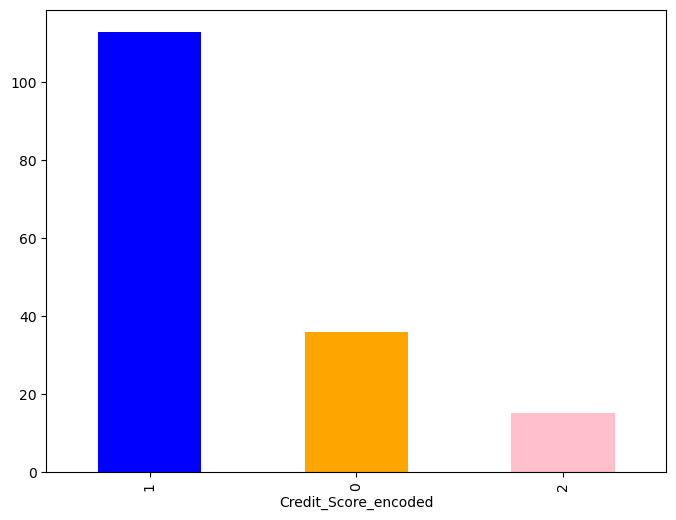

In [119]:
#seu código aqui
churn_counts = df['Credit_Score_encoded'].value_counts()
plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['blue', 'orange', 'pink'])

In [120]:
# Calcular e imprimir as porcentagens dos valores na coluna 'churn'
print((df['Credit_Score_encoded'].value_counts(normalize=True) * 100))

Credit_Score_encoded
1    68.902439
0    21.951220
2     9.146341
Name: proportion, dtype: float64


# ANÁLISE
Pelo gráfico vemos claramento um desbalanceamento na variável target. Muitos dos registros estão no tipo 1 poucos no tipo 0 e quase nenhum no tipo 2. Isso pode gerar um enviezamento no modelo. Por isso é de extrema importancia realizar o balanceamento desta variável.

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [121]:
#seu código aqui
from imblearn.over_sampling import SMOTE

# Criar uma instância do SMOTE
smote = SMOTE(random_state=42)

# Aplicar o SMOTE aos dados de treinamento (X_train, y_train)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar a distribuição das classes após o balanceamento
print("Distribuição das classes após o balanceamento:")
print(y_train_balanced.value_counts())

Distribuição das classes após o balanceamento:
Credit_Score_encoded
0    84
2    84
1    84
Name: count, dtype: int64


In [123]:
y_train_balanced.to_csv('y_train_balanced.csv', index=False)

In [124]:
X_train_balanced.to_csv('X_train_balanced.csv', index=False)

In [125]:
y_test.to_csv('y_test.csv', index=False)

In [126]:
X_test.to_csv('X_test.csv', index=False)